## Binomial Model
Ismael Oulkhir


Mail: oulkhir.ismael@gmail.com

LinkedIn: https://www.linkedin.com/in/ismail-oulkhir/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

The **one-period binomial model** is a simple financial model used to price options and other derivatives. It assumes that the price of an underlying asset can move to one of two possible states (up or down) over a single time period. Here’s a brief description:

---

### Key Components:
1. **Underlying Asset**:
   - Starts at an initial price $ S_0 $.
   - At the end of the period, it can move to:
     - $ S_u = S_0 \cdot u $ (up state) with probability $ P_u $,
     - $ S_d = S_0 \cdot d $ (down state) with probability $ P_d = 1 - P_u $.

2. **Parameters**:
   - $ u $: Up factor ($ u > 1 $).
   - $ d $: Down factor ($ 0 < d < 1 $).
   - $ P_u $: Probability of the up move.
   - $ P_d $: Probability of the down move.

3. **Risk-Neutral Probability**:
   - In a risk-neutral world, the expected return of the asset is the risk-free rate $ r $.
   - The risk-neutral probability $ q $ of the up move is calculated as:
     $
     q = \frac{(1 + r) - d}{u - d}.
     $

4. **Option Pricing**:
   - The value of an option (e.g., a call or put) is computed as the discounted expected payoff under the risk-neutral probability:
     $
     V_0 = \frac{1}{1 + r} \left( q \cdot V_u + (1 - q) \cdot V_d \right),
     $
     where:
     - $ V_u $: Payoff in the up state.
     - $ V_d $: Payoff in the down state.

---

### Steps:
1. Determine $ S_u $ and $ S_d $.
2. Compute the option payoffs $ V_u $ and $ V_d $ at expiration.
3. Calculate the risk-neutral probability $ q $.
4. Discount the expected payoff to get the option price $ V_0 $.

---

### Applications:
- Used to price European options.
- Provides a foundation for more complex models like the multi-period binomial model and the Black-Scholes model.

In [3]:
def binomial_option_price(S0, K, u, d, r):
    """
    Calculate the price of a European call option using the one-period binomial model.

    Parameters:
    S0 (float): Initial stock price.
    K (float): Strike price of the option.
    u (float): Up factor.
    d (float): Down factor.
    r (float): Risk-free rate.

    Returns:
    float: Price of the European call option.
    """
    # Risk-neutral probability of an up move
    q = (1 + r - d) / (u - d)
    
    # Stock prices at expiration
    Su = S0 * u  # Up state
    Sd = S0 * d  # Down state
    
    # Option payoffs at expiration
    Vu = max(Su - K, 0)  # Payoff in up state
    Vd = max(Sd - K, 0)  # Payoff in down state
    
    # Expected payoff
    expected_payoff = q * Vu + (1 - q) * Vd
    
    # Discount to present value
    V0 = expected_payoff / (1 + r)
    
    return V0

# Example usage
S0 = 100  # Initial stock price
K = 105   # Strike price
u = 1.2   # Up factor
d = 0.8   # Down factor
r = 0.05  # Risk-free rate

option_price = binomial_option_price(S0, K, u, d, r)
print(f"The price of the European call option is: {option_price:.2f}")

The price of the European call option is: 8.93


In [4]:
# Example for TSLA Stock
tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(period="1mo")
tsla_prices = tsla_data['Close'].values
S0 = tsla_prices[-1] # latest close stock price
K = 430   # Strike price
u = 1.05   # Up factor
d = 0.94   # Down factor
r = 0.0477  # Risk-free rate
option_price = binomial_option_price(S0, K, u, d, r)
print(f"The price of the European call option is: {option_price:.2f}")


The price of the European call option is: 16.66


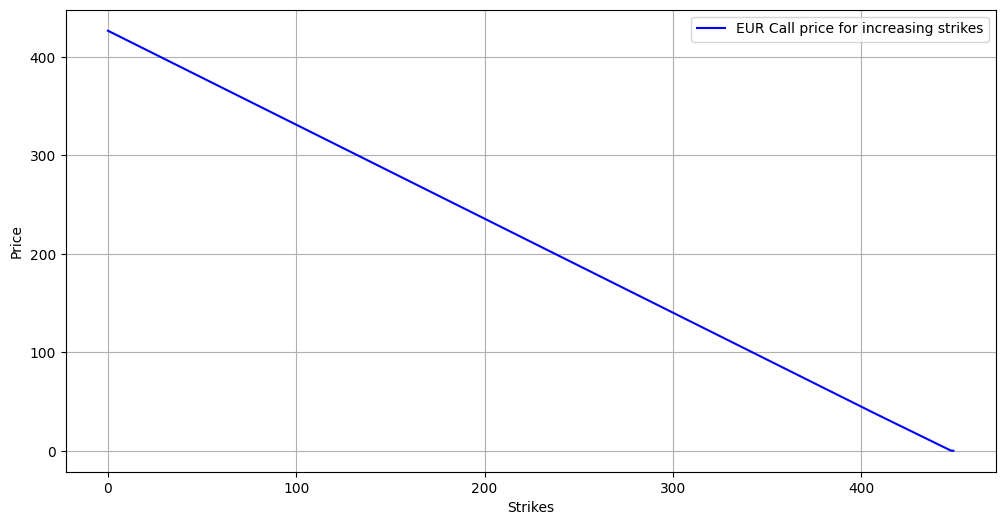

In [5]:
## Plotting price for different strikes from 430 to 450
S0 = tsla_prices[-1]
K = 430   # Strike price
u = 1.05   # Up factor
d = 0.94   # Down factor
r = 0.0477  # Risk-free rate
L=[k for k in range(0,450)]
P=[binomial_option_price(S0, k, u, d, r) for k in L]
plt.figure(figsize=(12, 6))
plt.plot(L, P, label="EUR Call price for increasing strikes", color="blue")
plt.xlabel("Strikes")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

There is a linear relationship between the price of a european call and the strike because the payoff decreases linearly with increasing K.

$max(S-K,0)$

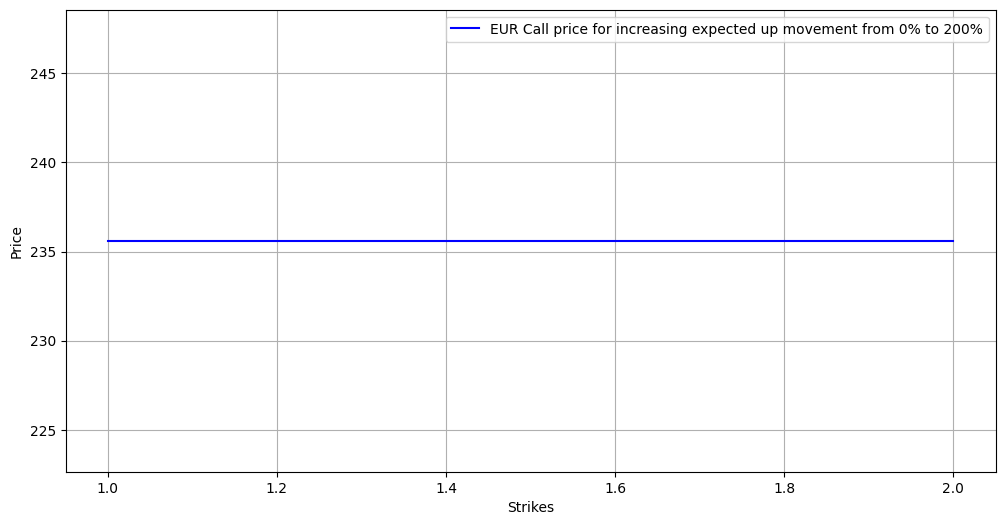

In [ ]:
## Plotting price for different strikes from 430 to 450
S0 = tsla_prices[-1]
K = 430 # Strike price
u = 1.05   # Up factor
d = 0.9   # Down factor
r = 0.0477  # Risk-free rate
L=np.linspace(1, 2, num=50, endpoint=True)
P=[binomial_option_price(S0, K, u, d, r) for u in L]
plt.figure(figsize=(12, 6))
plt.plot(L, P, label="EUR Call price for increasing expected up movement from 0% to 200%", color="blue")
plt.xlabel("Strikes")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()